# Python as your Swiss Army Knife 
## ...for data analysis, data processing, visualisation, web scraping, and system integration


-----------------




## What will you get?

  * You will learn Python! 
  * A whirlwind tour through the language, the standard library, and many of the most common external modules.
  
  
-----------------

## What will we talk about & apply?
  
  * Python programming basic, functions, control structures, OO development, bit of functional programming, and the advantages/diadvantages of dynamic languages
  * TDD with *Py.Test*
  * *Numpy* & *Pandas* for data representation and processing
  * *Matplotlib* and *Bokeh* for visualization
  * *IPython* for documentation and collaboration
  * Integration of CLI programs and C programs
  * Building and distibuting your own packages
  * Webscraping amongst others with *Beautifulsoup* and *Selenium*
  * Image processing with *OpenCV*
  * NLP with *NLTK*
  * Building CLI applications with *docopt*
  * A bit of *Flask*
  * Regular Expressions
  * *Multiprocessing*
  * ... and many more!


-----------------




## Why does it matter?

  * Quickly answering questions, i.e., data science.
  * Give you tools for your further professional and educational careers.
  * Build protoypes and glue systems effectively and efficiently.
  
**You will become a Mr./Mrs. Fixit!**
https://www.youtube.com/watch?v=tC5RRUTHp_U  
![](https://images.duckduckgo.com/iu/?u=https%3A%2F%2Fheavenlyjava.files.wordpress.com%2F2015%2F06%2Fimg_0665-1.png&f=1)



Likely based on the following literature: 

  * http://greenteapress.com/thinkpython2/html/index.html
  * https://automatetheboringstuff.com
  * http://shop.oreilly.com/product/0636920033400.do
  * http://shop.oreilly.com/product/0636920038375.do
  * http://shop.oreilly.com/product/0636920023784.do
  * http://shop.oreilly.com/product/0636920033424.do
  
  

# Sneak Peek


Imagine your boss in a marketing agency asks you if there is a relation between entry prices and start times for koncerts in Copenhagen so that the company can take a business decision.

You do not know the answer. But hey, you are Mr./Mrs. Fixit.


There is a web resource listing many concerts with additional information.
http://www.kultunaut.com/perl/arrlist/type-nynaut/UK?Startnr=0&Area=Kbh.+og+Frederiksberg&ArrStartday=29&ArrStartmonth=September&ArrStartyear=2016&ArrSlutday=15&ArrSlutmonth=Oktober&ArrSlutyear=2016&Sprogtype=&ArrMaalgruppe=&DefaultGenre=Musik&ArrKunstner=


After this course you will be able to find an answer to this and similar questions, for example, by writing a small web scraper and analysis tool.

In [2]:
import requests
import bs4
import re

# there is a page with all events...
# http://www.kultunaut.com/perl/arrlist/type-nynaut/UK?Startnr={0}&Area=Kbh.+og+Frederiksberg&ArrStartday=29&ArrStartmonth=September&ArrStartyear=2016&ArrSlutday=15&ArrSlutmonth=Oktober&ArrSlutyear=2016&Sprogtype=&ArrMaalgruppe=&DefaultGenre=Musik&ArrKunstner=
base_url = "http://www.kultunaut.com/perl/arrlist/type-nynaut/UK?Startnr={0}&Area=Kbh.+og+Frederiksberg" \
           "&ArrStartday=29&ArrStartmonth=September&ArrStartyear=2016&ArrSlutday=15&" \
           "ArrSlutmonth=Oktober&ArrSlutyear=2016&Sprogtype=&ArrMaalgruppe=&DefaultGenre=Musik&ArrKunstner="


def scrape_no_events(url):
    '''
    Find amount of pages to parse from the entry html page
    
    returns:
        An integer with the amount of events
    '''
    res = requests.get(base_url.format(0))
    res.raise_for_status()
    soup = bs4.BeautifulSoup(res.text, "html.parser")

    tables = soup.findAll("table")

    # The second table of depth three holds the amount of events
    depth3 = [t for t in tables if len(t.find_parents("table")) == 3]
    # The only bold element holds the amount of events
    event_str = depth3[1].find_all('b')[0].text.splitlines()[0]

    reg_exp = r"Showing .+ of (?P<events>\d+)"
    m = re.search(reg_exp, str(event_str))
    no_events = int(m.group('events'))

    return no_events

no_events = scrape_no_events(base_url.format(0))
print('Scraping {} events...'.format(no_events))

Scraping 456 events...


In [3]:
from tqdm import tqdm

    
def scrape_events_per_page(url):
    '''
    returns:
        A list of tuples of strings holding title, place, date, and price
        for concerts in Copenhagen scraped from Kulturnaut.dk
    '''
    res = requests.get(url)
    res.raise_for_status()
    soup = bs4.BeautifulSoup(res.text, "html.parser")

    event_cells = soup.find_all('td', {"width": "100%", "valign" : "top"})

    scraped_events_per_page = []
    for event_cell in event_cells:
        try:
            title = event_cell.find('b').text
            spans = event_cell.find_all('span')
            place = spans[1].text
            try:
                date, price = spans[0].text.splitlines()
            except ValueError, e:
                date = spans[0].text.splitlines()[0]
                price = ''
        except Exception, e:
            print(e)
            
        scraped_events_per_page.append((title, place, date, price))
        
    return scraped_events_per_page


scraped_events = []
for idx in tqdm(range(0, no_events, 20)):
    if idx > 0:
        idx += 1

    scrape_url = base_url.format(idx)
    scraped_events += scrape_events_per_page(scrape_url)

100%|██████████| 23/23 [00:15<00:00,  1.47it/s]


# What do we have so far?

In [ ]:
scraped_events

# We extract dates and prices from strings.

In [27]:
from dateparser import parse

price_regexp = r"(?P<price>\d+)"

data_points = []
# Cleanup the data
# Get price as integer and date as date
for event_data in scraped_events:
    title_str, place_str, date_str, price_str = event_data
    if 'Free admission' in price_str:
        price = 0
    else:
        m = re.search(price_regexp, price_str)
        try:
            price = int(m.group('price'))
        except:
            price = 0

    date_str = date_str.strip().strip('.')
    if '&' in date_str:
        date_str = date_str.split('&')[0]
    if '-' in date_str:
        date_str = date_str.split('-')[0]
    if '.' in date_str:
        date_str = date_str.replace('.', ':')

    date = parse(date_str)
    if date:
        data_points.append((date, price))


In [ ]:
data_points

# Plotting dates vs. times gives us a first feeling of a possible correlation.

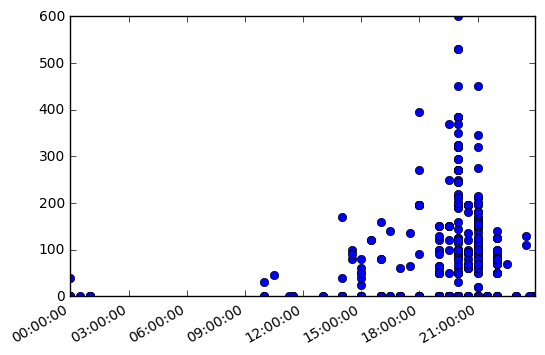

In [30]:
%matplotlib inline 

import matplotlib
import datetime
import numpy as np
import matplotlib.pyplot as plt

x, y = zip(*data_points)
ref_day = datetime.datetime.today()
x = [ datetime.datetime.combine(ref_day, t.time()) for t in x ]

# plot
plt.plot(x, y, 'o')
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

# Finally, some statistics to answer our boss' question.

In [31]:
from scipy.stats.stats import pearsonr

x, y = zip(*data_points)
x = matplotlib.dates.date2num(x)

pearsonr(x, y)

(-0.070348079782865391, 0.13666171366285015)

In [32]:
data_points = [(date, price) for date, price in data_points if price > 0]

x, y = zip(*data_points)
x = matplotlib.dates.date2num(x)

pearsonr(x, y)

(0.013230207595647891, 0.83347981758573297)